# Practical 6: Pandas data discovery - Geospatial analysis


<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we start using the Pandas package to load data from files and visualise our results on a map. To do this we will use a data file that contains information on historial volcanic eruptions. We will do this through the following activities:
    
 - 1) [Introduction: The Pandas package](#Part1)
      * [Exercise 1: Plot eruption locations](#Exercise1)
 - 2) [Selecting a subset of data according to some criteria](#Part2)
      * [Exercise 2: Quantify the number of unique eruption locations](#Exercise2)
      * [Exercise 3: Plot the location of eruptions in 2019](#Exercise3)
      * [Exercise 4: Plot the location of eruptions between 40 degrees north and 40 degrees south](#Exercise4)
 - 3) [Generating histograms](#Part3)
      * [Exercise 5: Plot a histogram of eruptions at Mount Etna between 1200 and the present day](#Exercise5)
 
As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

We provide you with functions to plot on a map. Please do not worry about trying to remember all of the syntax in the code we provide. As noted in the lectures, this course is aimed at building experience in using Python and many of its features. Even seasoned professionals have to look up solutions from old files or online! 

We will be using data obtained from the [Smithsonian Global Volcanism Program](https://volcano.si.edu)

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, search the code snippets for a note that reads -------'INSERT CODE HERE'------- to identify where you need to write your code 
</div>

<div class="alert alert-block alert-danger">
<b> Using Google Colabs </b> Please note that the first code block ensures that we can install the module Cartopy IF we are running this example on Google Colab. Please run this code block and, if you are not on Google Colab, you will recieve a message that confirms this. If you are on Colabs, you will see messages regarding the status of the installation.
</div>

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !apt-get install libproj-dev proj-bin proj-data
    !apt-get install libgeos-dev
    # shapely needs to be reinstalled to use the same geos install as cartopy (https://github.com/SciTools/cartopy/issues/871)
    !pip uninstall -y shapely
    !pip install --no-binary shapely shapely
    !pip install cartopy
else:
     print('Not running on CoLab')

if 'google.colab' in str(get_ipython()):
    from google.colab import drive
    mount='/content/gdrive'
    print("Colab: mounting Google drive on ", mount)
    drive.mount(mount)
    drive_root = mount + "/My Drive/Colab Notebooks/DEES_first_year/DEES_programming_course"
    # Change to the directories to get data files
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
else:
    print('Not running on CoLab')

## 1) Introduction: The Pandas package <a name="Part1">

It is worthwhile spending some time introducing the Pandas package. Python is naturally able to deal with data input and output, or 'IO'. So why dont we use default functions in Python? Well, the key is really in the opening definition of Pandas on the [homepage](https://pandas.pydata.org):

>> _"pandas...provides high-performance, easy-to-use data structures and data analysis tools.."_

As we will see shortly, the ability to easily load in data files *and* interpet them in a human readible way is a very powerful tool for any proceeding analysis. The 'high performance' element is key when you start working with very large datafiles.

### The Pandas Dataframe

When we load data using Pandas, we create what is referred to as a dataframe. A useful short summary of the dataframe can be [defined as](https://www.geeksforgeeks.org/python-pandas-dataframe/):

>> _" [A] Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns."__

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/Practical_5_figure1.png?raw=true) 
<h3><center>Figure 1 - Visualising a data frame. source: https://www.geeksforgeeks.org/python-pandas-dataframe/ </center></h3>

So, this looks like a common table, right? It is much more powerful that that. A dataframe has features we can use to our advantage. These include: the ability to quickly select rows according to some criteria such as when a value is true; Removing all rows/columns when a value of criteria is true/false; Mapping a text date entry to a numerical value for plotting; deriving statistics from a column such as mean, max etc. We will practice some of these functions in this practical. 

We can also easily extract data from our data frame for plotting. Let's start by loading some data through Pandas. Please see the code snippets below. How do we load any package in Python? We use the import statement. As with the Numpy package, it is common to see pandas loaded as 'pd':

In [2]:
#Lets load in some data using the Pandas package. First we need to import that package.
import pandas as pd #Im using pd here as its easier to keep writing! You can use whatever you want, but it might help you to use 'pd' for now.
import os
from os import path

path=os.getcwd()

# Read data from file 'GVP_Eruption_Results.csv' 
# We are going to use the function 'read_csv' within the Pandas package:

data = pd.read_csv(path+"/data/GVP_Eruption_Results.csv") 
data.head()
# Notice how we call that function using the '.' operator?
# (Note the data file needs to be in the same directory that your jupyter notebook is based) You can control delimiters, rows, column names with read_csv (see later) 

# How do we preview the data file.
# Preview the first 5 lines of the loaded data 
data.head()

#Pandas has loaded the data into a dataframe. By using the extension .head() we can take a look at the data products 
#available. At the moment this looks like a matrix where the rows are simply data entries, rather than ordered by
#a particular variable, such as time of eruption or eruption number. At least we can scan the range of column headings
#and think about what we want to do next. By the way this is also a good way of ensuring you have loaded in the data
#you expect. Sound silly? If you work with lots of datafiles it can be easy to assume you are working on the correct
#one

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,252120,Ulawun,22319,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,27.0,NaN,-5.050,151.330
1,354020,Ubinas,22324,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,>,2019.0,NaN,7.0,NaN,11.0,NaN,-16.355,-70.903
2,290250,Raikoke,22321,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,7.0,NaN,1.0,NaN,48.292,153.250
3,233020,"Fournaise, Piton de la",22318,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,13.0,NaN,-21.244,55.708
4,311120,Great Sitkin,22322,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,7.0,NaN,52.076,-176.130


Now let's have a look at the spatial coverage of the entire sheet. Actually before we do that, let's see how many rows we have. This isnt always the best way to calculate the number of unique entries as duplicate datapoints can be common, but now that we have created a dataframe we can see how many entries it has. We can do this via the following properties of our frame: 

```python
data.size
data.shape
data.ndim
```

In [3]:
#dataframe.size - as in rows x columns
size = data.size 
print("Size of dataframe =", size)
  
# dataframe.shape - gives the seperated number of rows, columns, etc
shape = data.shape 
print("Shape of dataframe =", shape)
  
# dataframe.ndim  - Number of dimensions. Do we have a 2D array, 3D array?? etc
ndim = data.ndim 
print("Number of dimensions =", ndim)

Size of dataframe = 237384
Shape of dataframe = (9891, 24)
Number of dimensions = 2


We can also check the number of entries in any given column. We access a column entry in Pandas by its name. This is very useful, and more helpful than having to remember which column number holds a given entry. The way we can access a specific column is through the square parentheses:

```python
data[column name]
```

where our column name, in this case, is 'Eruption Category'. Often in Python we chain operations together. In the example above we access the number of dimensions through the operator **'.ndim'**. Let's see how many entries we have on the 'Eruption Category':

In [4]:
# series.ndim  - Again im using my own variable name here as 'series'. It dosnt matter. What matters is the correct name of the column
series_ndim = data["Eruption Category"].ndim 
print("Number of dimensions =", series_ndim)

series_size = data["Eruption Category"].size 
print("Shape of dataframe =", series_size)

series_shape = data["Eruption Category"].shape 
print("Size of dataframe =", series_shape)

Number of dimensions = 1
Shape of dataframe = 9891
Size of dataframe = (9891,)


As we expect, it is a 1D array and has 9891 entries which matches up with the number of rows in the dataframe. Now let's plot the location of each eruption on a global map. Scroll back to the previous example provided by the *.head()* function and you can see two columns give both lattitude and longitude of each eruption. 

### Geospatial plots

For our map based plots, we are going to use the module [Cartopy](https://scitools.org.uk/cartopy/docs/v0.13/index.html). First of all let's produce a map of the world. Do not worry about the syntax used for plotting, we will provide templates for all such work. For now, try to get a feel for operations used by comparing the code syntax with the comments provided. Please note that internal functions provided by any given package will have its own set of expected inputs and outputs. 

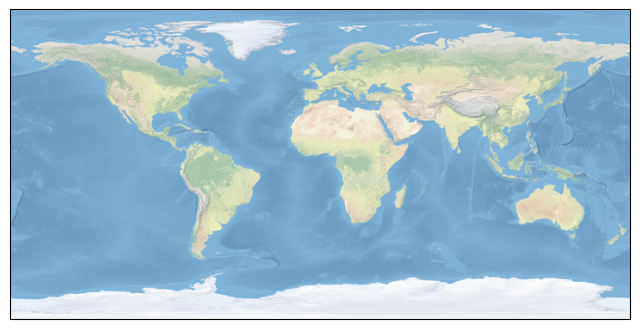

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.show()

Let's make the figure a little bigger. Twice the size? Let's scale our 'figsize' parameters accordingly.

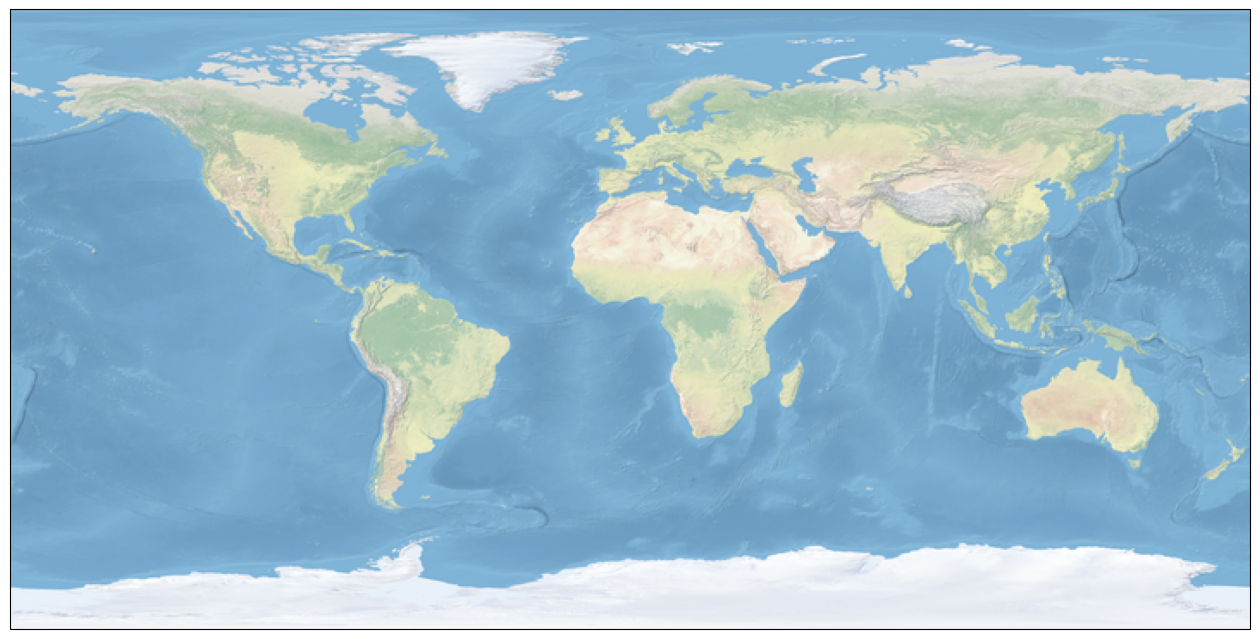

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.show()

The great feature about this map is that it isnt just an image. It also acts as a fully-functioning Matplotlib axes that accepts spherical coordinates and allows us to easily plot data on it. Let's do that by adding the location of every eruption from our dataframe. To do this we are going to extract the lattitude and longitude coordinates. Recall from the exercise above that we can access columns from our dataframe by the column name through the square parentheses. When we extract the values of that column, by using the <code> .values() </code> operator, we are given a numpy array. 
Thus, we can chain two operations together to create a new Numpy array of Latitude values:

In [7]:
Latitude = data['Latitude'].values # Extract the 'Latitude' column and then its .values
Latitude #This will just print a preview of our array to the screen. 

array([ -5.05 , -16.355,  48.292, ...,  38.654,  43.42 ,  -4.889])

In [8]:
Longitude = data['Longitude'].values # We can do the same with Longitude values
Longitude

array([ 151.33 ,  -70.903,  153.25 , ...,   42.229, -113.5  ,   31.933])

So now let's put this data onto our map as a scatter plot of red datapoints. The syntax below might be a little confusing. Notice how, after we again create a 'bluemarble' image, we also pass the Longitude and Latitude arrays to our map. The reason we are doing this is because we need to convert our coordinates to a spherical system in order to plot this on the map as it currently is presented. Don not worry about the syntax here, this is just to illustrate how we take out Numpy arrays and map the coordinates. 

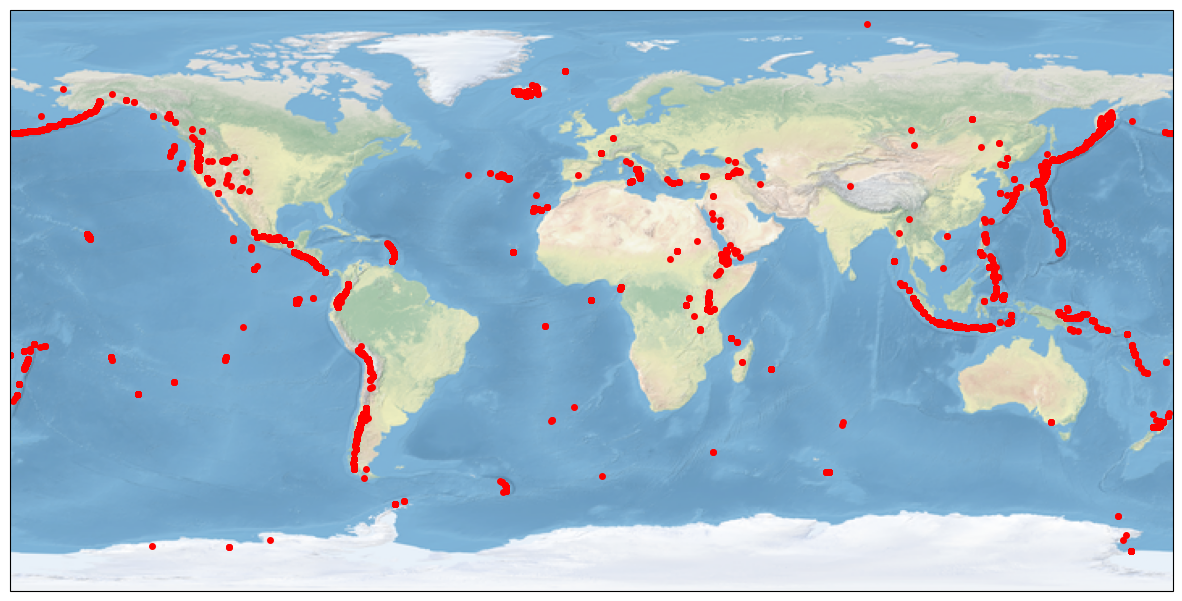

In [9]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

Latitude = data['Latitude'].values # Extract the 'Latitude' column and then its .values
Longitude = data['Longitude'].values # We can do the same with Longitude values

plt.scatter(Longitude, Latitude,
         color='red', linewidth=2, s=9, marker='o',
         transform=ccrs.PlateCarree(),
         )

plt.show()

Looks cool dosnt it?! Notice how we specified the symbol and colour used for our points? Matplotib has a number of options we can use. You can find them all on the package [website](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). The following table includes a subset:

| character | description |
| --- | --- |
| '.'| point marker |
| ','| pixel marker |
| 'o'| circle marker |
| 'v'| triangle_down marker |
| '^'| triangle_up marker |
| '<'| triangle_left marker |
| '>'| triangle_right marker |

<div class="alert alert-block alert-success">
<b> Exercise 1: Plot eruption locations. <a name="Exercise1"></a>  </b> To get a feel for how we might change the appearance of a map based plot, repeat the above but with green circles that are twice as big as the previous version. I would reccomend restarting all code snippets by clicking on <code> Kernel </code> in the toolbar and then <code> Restart and Run All </code>.
</div>

In [10]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

# -------'INSERT CODE HERE'-------

Latitude =   # Extract the 'Latitude' column and then its .values
Longitude =  # We can do the same with Longitude values

# --------------------------------

plt.show()

SyntaxError: invalid syntax (107685284.py, line 11)

### 2) Selecting a subset of data according to some criteria <a name="Part2">

We can even colour each point according to how many times an eruption has occured in a given location. In the first figure above we have used red circles for everything. We can pass an array of colours which change according to the number of entries. Before we do that, lets try and contextualise the data a little more and calculate the maximum and minimum of the column labeled **'Start Year'**. We can  extract the values from this column and then use internal functions in the Numpy library. Namely:

```python
np.min 
np.max
```
We havent imported the Numpy module yet so we need to do that first. Read through the code below. After importing Numpy we then access the values in the dataframe column 'Start Year' using:

```python
data['Start Year'].values
```

which gives us a Numpy array. Once we have this array we can pass this to the Numpy function <code> .min </code> as:

```python
Years = data['Start Year'].values 
Earliest_eruption = np.min(Years)
```

Can you see how we also calculate the latest eruption?

In [11]:
import numpy as np #Import the Numpy library as per usual
Years = data['Start Year'].values #Select the column 'Start Year' and extract the values from this column to a new Numpy array
Earliest_eruption = np.min(Years) #Use the internal Numpy function .min to calculate the minimum
print("Earlist Eruption occured in ", Earliest_eruption) # Print this value to the screem
Latest_eruption = np.max(Years) # Now find the maximum
print("Latest Eruption occured in ", Latest_eruption) # Print this value to screen

Earlist Eruption occured in  -10450
Latest Eruption occured in  2019


Does this make sense? Do we have an error in our database?

We can also identify unique entries in our locations using the function:

```python
.value_counts()
```

This can be useful, especially for categorical data, for a number of reasons. We can demonstrate this by creating a list of unique locations and then calculating the number of entries for each location. Thus, again after accessing a column from our data frame, we can write:

In [12]:
data['Volcano Name'].value_counts()

Etna                      196
Fournaise, Piton de la    187
Asosan                    171
Villarrica                152
Katla                     128
                         ... 
Tskhouk-Karckar             1
Yucamane                    1
West Mata                   1
Novarupta                   1
Cendres, Ile des            1
Name: Volcano Name, Length: 862, dtype: int64

But how do we find how many unique entries there are? We can check the size of this newly created array using the ``` .size ``` property introduced earlier. Please try and do that in the next exercise.

<div class="alert alert-block alert-success">
<b> Exercise 2: Quantify the number of unique eruption locations <a name="Exercise2"></a>  </b> 
    
Extend the above procedure to calculate how many entries there are.
</div>

In [13]:
# <<-------------------- INSERT CODE HERE ----------------------->>
unique_eruptions =  
print("Number of unique locations = ",unique_eruptions.size)
# <<------------------------------------------------------------->>

Number of unique locations =  862


We can also select a subset of data to be plotted from a dataframe according to a set of criteria. For example, if we only want to plot data from eruptions that occured in 2019, lets take a sneak peak at the reduced dataframe created by the following code:

In [14]:
data[data['Start Year'] == 2019].head()

,Volcano Number,Volcano Name,Eruption Number,Eruption Category,Area of Activity,VEI,VEI Modifier,Start Year Modifier,Start Year,Start Year Uncertainty,...,Evidence Method (dating),End Year Modifier,End Year,End Year Uncertainty,End Month,End Day Modifier,End Day,End Day Uncertainty,Latitude,Longitude
0,252120,Ulawun,22319,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,27.0,NaN,-5.050,151.330
1,354020,Ubinas,22324,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,>,2019.0,NaN,7.0,NaN,11.0,NaN,-16.355,-70.903
2,290250,Raikoke,22321,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,7.0,NaN,1.0,NaN,48.292,153.250
3,233020,"Fournaise, Piton de la",22318,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,13.0,NaN,-21.244,55.708
4,311120,Great Sitkin,22322,Confirmed Eruption,NaN,NaN,NaN,NaN,2019,NaN,...,Historical Observations,NaN,2019.0,NaN,6.0,NaN,7.0,NaN,52.076,-176.130


Let us break this down a little. At the beginning of this notebook we issued the command:

```python
data.head()
```
But now we can be more selective about which subset of the dataframe we look at, or deal with, via:

```python
data[data['Start Year'] == 2019].head()
```

which is asking Python to select only those data entries where values in the column 'Start Year' are equal to 2019. Let us build on this and, in exercise 3, you are tasked with now extracting the Latitude and Longitude of those eruptions and creating a new plot.

<div class="alert alert-block alert-success">
<b> Exercise 3: Plot the location of eruptions in 2019 <a name="Exercise3"></a>  </b> 
    
Following on from code already provided in this notebook, extract the coordinates of eruptions that occured in 2019 and plot them on a new map using red circles. Please complete the code provided below.  You will need to chain together a few operations:

 - Extract a subset of the dataframe 'data' where the Start Year variable is equal to 2019
 - From the above, extract the Latitude and Longitude values seperately
    
</div>

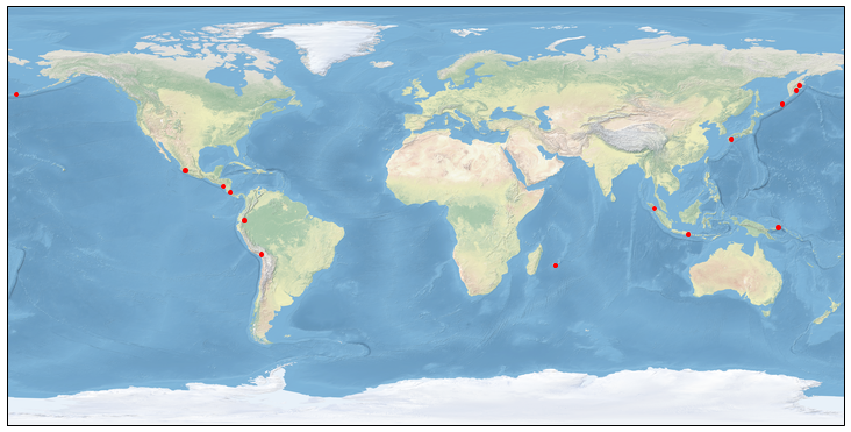

In [15]:
# <<-------------------- INSERT CODE HERE ----------------------->>

Latitude =  # Extract the 'Latitude' column and then its .values
Longitude =  # We can do the same with Longitude values

# <<------------------------------------------------------------->>
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(Longitude, Latitude,
         color='red', linewidth=2, s=9, marker='o',
         transform=ccrs.PlateCarree(),
         )

plt.show()

As a reminder, the following table lists the Python equivalent of common mathematical symbols to check numerical values.

| Meaning | Math Symbol | Python Symbols |
| --- | --- | --- |
| Less than	 | < | < | 
| Greater than	 | > | > | 
| Less than or equal | ≤ | <= | 
| Greater than or equal | ≥ | >= | 
| Equals | = | == | 
| Not equal | ≠ | != | 



<div class="alert alert-block alert-success">
<b> Exercise 4: Plot the location of eruptions between 40 degrees north and 40 degrees south <a name="Exercise4"></a>  </b> 
    
We have just selected data from our dataframe using one criterion. What if we wanted to introduce a number of conditions? Generally, we can select data that matches two criteria as, for example:

```python
data[(data['Column A'] > X ) & (data['Column A'] < Y)]
```
if we wanted to only take data where <code> Column A </code> values were greater than <code> X </code> but less than <code> Y </code>. Can you now implement the required task? When complete you should only see data points between these boundaries.
</div>

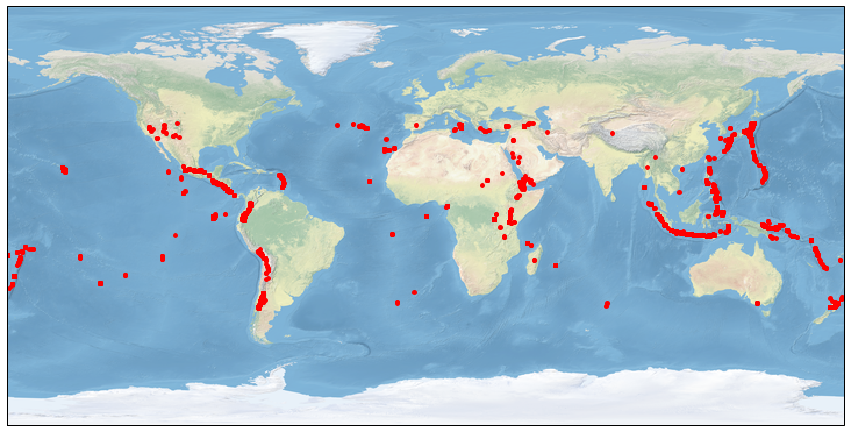

In [16]:
# <<-------------------- INSERT CODE HERE ----------------------->>
Latitude =   # Extract the 'Latitude' column and then its .values
Longitude =   # We can do the same with Longitude values
# <<------------------------------------------------------------->>

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

plt.scatter(Longitude, Latitude,
         color='red', linewidth=2, s=9, marker='o',
         transform=ccrs.PlateCarree(),
         )

plt.show()

### 3) Generating histograms <a name="Part3">

To finish this practical, we can focus on visualising data as a histogram. In this case, let us select the most frequent location and plot a histogram of when the eruptions occured. First, we need to work out which location has registered the most frquent number of eruptions. We have already used the function:

```python
data['Volcano Name'].value_counts()
```

If we add the extension .idxmax() to the above, Python gives us the name associated with the maximum number of entries in this column. Thus:

In [17]:
data['Volcano Name'].value_counts().idxmax()

'Etna'

This means we can now select data from our dataframe accordingly. How do we do that? We can again use a conditional statement as follows:

```python
data[data['Volcano Name'] == 'Etna']
```

We keep using the '.' operator to access functions associated with our dataframe. We can also use this apporoach to create a histogram of the number of eruptions given by a specific category. In this case, let's create a histogram of this information using the column <code> Start Year </code>. If you look at the code below, our new function <code> .hist </code> takes one input which is specifying the column <code> Start Year </code>.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B64C2A1708>]],
      dtype=object)

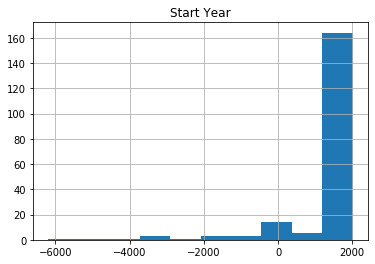

In [5]:
data[data['Volcano Name'] == 'Etna'].hist(column='Start Year')

Interesting but lacking resolution for us to infer behaviour in the last few centuries. We can further refine the data we want to plot by constraining data from, say, 1200 to the present data. Again we do this by using a conditional statement in square brackets []. This task forms the focus of your final exercise below.

<div class="alert alert-block alert-success">
<b> Exercise 5: Plot a histogram of eruptions at Mount Etna between 1200 and the present day <a name="Exercise5"></a>  </b> 
    
Remember, we can select data that matches two criteria as, for example:

```python
data[(data['Column A'] > X ) & (data['Column A'] < Y)]
```
if we wanted to only take data where <code> Column A </code> values were greater than <code> X </code> but less than <code> Y </code>. Can you now implement the required task? When complete you should only see data points between these boundaries.
</div>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xb211238d0>]],
      dtype=object)

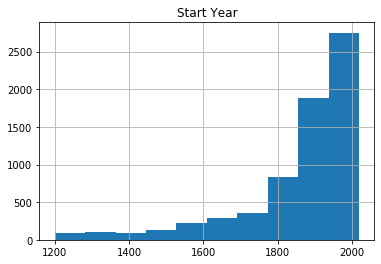

In [19]:
# <<-------------------- INSERT CODE HERE ----------------------->>

# <<------------------------------------------------------------->>
